#Загрузка библиотек и моделей

In [ ]:
! pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-eacmj2rl
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-eacmj2rl
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 1.6 MB/s eta 0:00:00
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369489 sha256=29d8c2aee3ec534ebbe26dbce07e5053d6729e26c5453c7b5c58b197e0adbc8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-en3jz5d8/wheels/da/2b/4c/d6691fa9597aac8bb85d2ac13b112deb897d5b50f5ad9a37e4
Successfully built clip


In [ ]:
! pip install --upgrade transformers accelerate sentencepiece optimum bitsandbytes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behavi

In [ ]:
import torch
import clip
import transformers

from transformers import AutoModelForCausalLM, AutoTokenizer

assert torch.cuda.is_available(), "you need cuda for this part"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
clip_model, preprocess = clip.load("ViT-B/32", device="cuda")

100%|███████████████████████████████████████| 338M/338M [00:09<00:00, 36.7MiB/s]


In [ ]:
model_name = "Enoch/llama-7b-hf"

tokenizer = transformers.LlamaTokenizer.from_pretrained(model_name, device_map=device)
tokenizer.pad_token_id = tokenizer.eos_token_id

model = transformers.AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    low_cpu_mem_usage=True,
    offload_state_dict=True,
    load_in_4bit=True,
    torch_dtype=torch.float32,  # weights are 4-bit; layernorms and activations are fp32
)
for param in model.parameters():
    param.requires_grad = False

model.gradient_checkpointing_enable()  # only store a small subset of activations, re-compute the rest.
model.enable_input_require_grads()  # override an implementation quirk in gradient checkpoints that disables backprop unless inputs require grad

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/218 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama.LlamaTokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message


config.json:   0%|          | 0.00/511 [00:00<?, ?B/s]

The `load_in_4bit` and `load_in_8bit` arguments are deprecated and will be removed in the future versions. Please, pass a `BitsAndBytesConfig` object in `quantization_config` argument instead.


pytorch_model.bin.index.json:   0%|          | 0.00/25.5k [00:00<?, ?B/s]

pytorch_model-00001-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00002-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00003-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00004-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00005-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00006-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00007-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00008-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00009-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00010-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00011-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00012-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00013-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00014-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00015-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00016-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00017-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00018-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00019-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00020-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00021-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00022-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00023-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00024-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00025-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00026-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00027-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00028-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00029-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00030-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00031-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00032-of-00033.bin:   0%|          | 0.00/405M [00:00<?, ?B/s]

pytorch_model-00033-of-00033.bin:   0%|          | 0.00/524M [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/33 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/151 [00:00<?, ?B/s]

#Предобработка данных

In [ ]:
from datasets import load_dataset
train_size = 10000
test_size = 10
train_dataset = load_dataset("nlphuji/flickr30k", split=f'test[:{train_size}]').shuffle()
test_dataset = load_dataset("nlphuji/flickr30k", split=f'test[-{test_size}:]').shuffle()

README.md:   0%|          | 0.00/641 [00:00<?, ?B/s]

flickr30k.py:   0%|          | 0.00/2.51k [00:00<?, ?B/s]

0000.parquet:   0%|          | 0.00/506M [00:00<?, ?B/s]

0001.parquet:   0%|          | 0.00/502M [00:00<?, ?B/s]

0002.parquet:   0%|          | 0.00/506M [00:00<?, ?B/s]

0003.parquet:   0%|          | 0.00/512M [00:00<?, ?B/s]

0004.parquet:   0%|          | 0.00/504M [00:00<?, ?B/s]

0005.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

0006.parquet:   0%|          | 0.00/495M [00:00<?, ?B/s]

0007.parquet:   0%|          | 0.00/497M [00:00<?, ?B/s]

0008.parquet:   0%|          | 0.00/289M [00:00<?, ?B/s]

Generating test split:   0%|          | 0/31014 [00:00<?, ? examples/s]

In [ ]:
import cv2

def to_one_size(dataset, sizes=None):
  images = [np.array(elem['image']) for elem in dataset]

  if not sizes:
    images_shapes = [np.array(elem['image']).shape for elem in dataset]

    min_width = min(size[0] for size in images_shapes)
    min_height = min(size[1] for size in images_shapes)

    sizes = (min_height, min_width)

  resized_images = [np.array(cv2.resize(image, sizes)) for image in images]
  return resized_images

In [ ]:
import numpy as np
from torch.utils.data import Dataset, DataLoader

class ImageCaptionDataset(Dataset):
    def __init__(self, images, captions, transform=None):
        self.images = images
        self.captions = captions
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = np.array(self.images[idx])
        if self.transform:
            image = self.transform(image)
        caption = self.captions[idx]
        return image, caption

In [ ]:
train_images = to_one_size(train_dataset, sizes=(224, 224))
# train_images = [np.array(elem['image']) for elem in train_dataset]
train_captions = [elem['caption'][0] for elem in train_dataset]
train = ImageCaptionDataset(train_images, train_captions)
train_loader = DataLoader(train, batch_size = 10, shuffle=True)

test_images = to_one_size(test_dataset, sizes=(224, 224))
test_captions = [elem['caption'][0] for elem in test_dataset]
# test_images = [np.array(elem['image']) for elem in test_dataset]
test = ImageCaptionDataset(test_images, test_captions)
test_loader = DataLoader(test, batch_size = 10, shuffle=True)

#Определим отображение

In [ ]:
import torch.nn as nn

In [ ]:
class MappingNetwork(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(MappingNetwork, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, 512),
            nn.ReLU(),
            nn.Linear(512, output_dim)
        )

    def forward(self, x):
        return self.fc(x)

In [ ]:
input_dim = 512  # размерность эмбединга клипа
output_dim = model.config.hidden_size
mapping_network = MappingNetwork(input_dim, output_dim).to("cuda")

# Train

In [ ]:
import torch.optim as optim
from tqdm import tqdm

In [ ]:
learning_rate = 1e-4
num_epochs = 4
weight_decay = 0.01

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer = optim.AdamW(mapping_network.parameters(), lr=learning_rate, weight_decay=weight_decay)

for epoch in range(num_epochs):
  epoch_loss = 0
  with tqdm(total=len(train_loader)) as progress_bar:
      for images, captions in train_loader:
          images = np.transpose(images, (0, 3, 1, 2))
          images = images.to("cuda")
          captions = tokenizer(captions, return_tensors="pt", padding=True, truncation=True).to("cuda")

          with torch.no_grad():
              image_features = clip_model.encode_image(images)

          mapped_features = mapping_network(image_features.to(torch.float32))

          sequence_length = captions["input_ids"].shape[1]
          mapped_features = mapped_features.unsqueeze(1).repeat(1, sequence_length, 1)

          outputs = model(inputs_embeds=mapped_features, labels=captions["input_ids"])

          loss = outputs.loss
          epoch_loss += loss.item()

          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          del mapped_features, outputs
          torch.cuda.empty_cache()

          progress_bar.update()
          progress_bar.set_description(f'Batch Loss = {loss.item()}')

      progress_bar.set_description(f'Epoch Loss = {epoch_loss / len(train_loader)}')
      progress_bar.refresh()

Batch Loss = 4.2504072189331055:  53%|█████▎    | 532/1000 [27:41<23:31,  3.02s/it]

# Test

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def images_with_captions(images, captions):
  plt.figure()
  for i in range(len(images)):
      plt.imshow(images[i])
      plt.title(captions[i])
      plt.axis('off')
      plt.show()

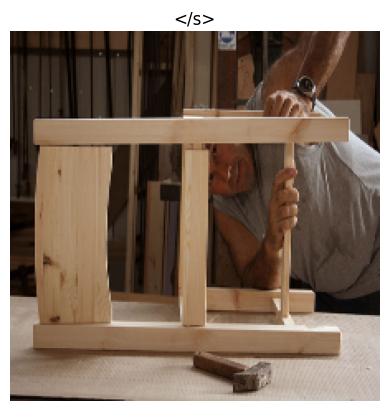

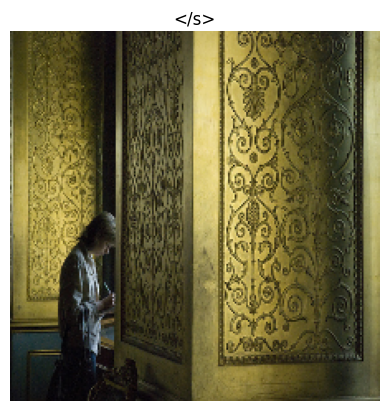

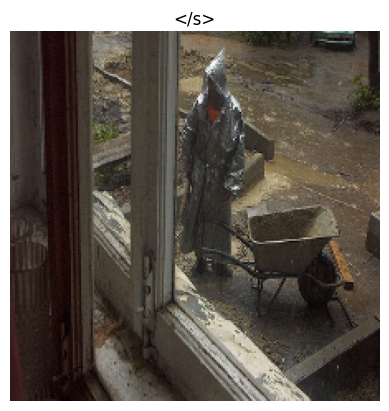

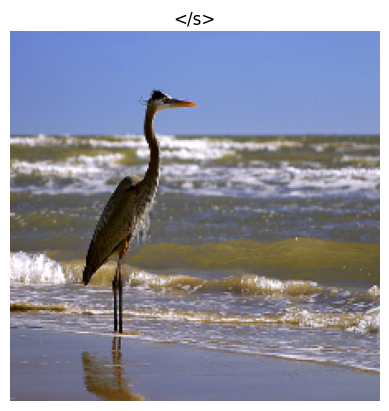

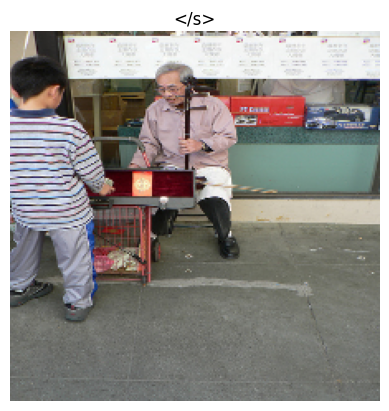

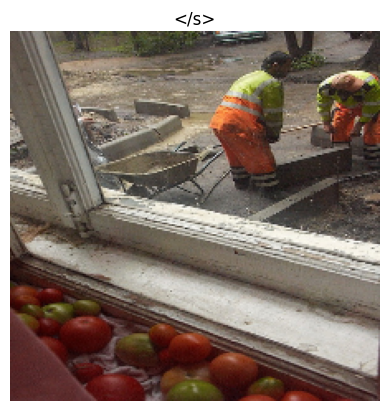

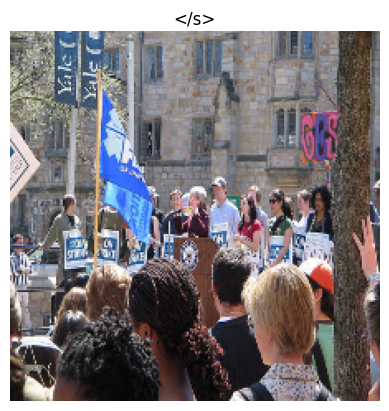

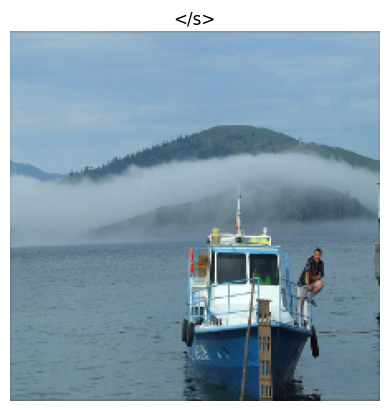

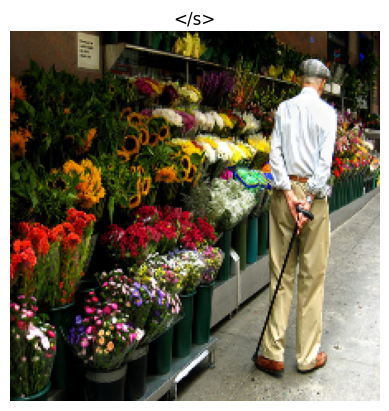

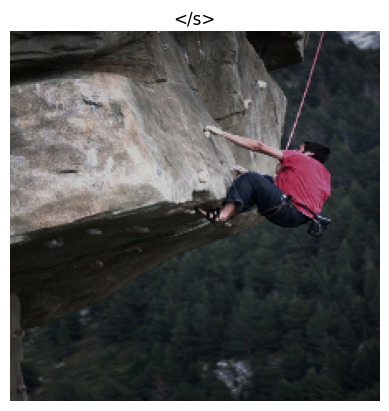

Generated Captions: ['</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>', '</s>']


In [ ]:
mapping_network.eval()
model.eval()

with torch.no_grad():
    for images, captions in test_loader:
        orig_images = images

        images = np.transpose(images, (0, 3, 1, 2))
        images = images.to("cuda")

        captions = tokenizer(captions, return_tensors="pt", padding=True, truncation=True).to("cuda")

        image_features = clip_model.encode_image(images)

        # image_features = (image_features - image_features.mean()) / image_features.std()

        mapped_features = mapping_network(image_features.to(torch.float32))
        # mapped_features = (mapped_features - mapped_features.mean()) / mapped_features.std()

        sequence_length = captions["input_ids"].shape[1]
        mapped_features = mapped_features.unsqueeze(1).repeat(1, sequence_length, 1)
        # print(mapped_features)

        attention_mask = torch.ones(mapped_features.shape[:2], dtype=torch.long).to("cuda")
        decoder_input_ids = torch.ones((mapped_features.shape[0], 1), dtype=torch.long)*model.config.bos_token_id
        outputs = model.generate(attention_mask=attention_mask, inputs_embeds=mapped_features, max_length=100, num_beams=4)

        # outputs = model.generate(inputs_embeds=mapped_features, max_length=1000)
        # print(outputs)

        generated_captions = tokenizer.batch_decode(outputs, skip_special_tokens=False)

        images_with_captions(orig_images, generated_captions)

        print("Generated Captions:", generated_captions)

Я так и не смогла найти причину, почему он генерирует только токен останова :(